# Importing Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt


In [116]:
data = pd.read_csv("advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [119]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Feature Engineering

Saving `Clicked on Ad` column in `target`

In [120]:
target = data.loc[:,'Clicked on Ad']
data1 = data.drop('Clicked on Ad',axis=1)
target

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [121]:
data1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18


In [122]:
print(data1.Country.nunique())
print(data1.City.nunique())
print(data1['Ad Topic Line'].nunique())

237
969
1000


As we can see there are we less unique value in `City` and `Ad Topic Line`.

So we will drop it.

In [123]:
data2 = data1.drop(['City','Ad Topic Line','Timestamp'], axis = 1)

# EDA

<AxesSubplot:>

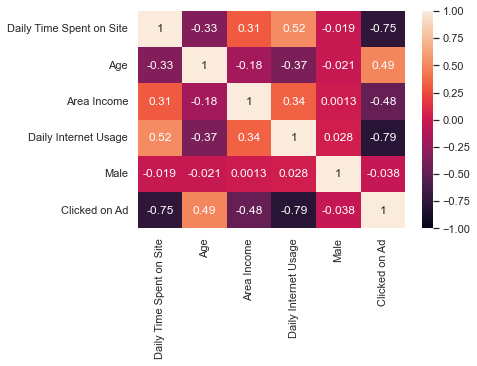

In [124]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)

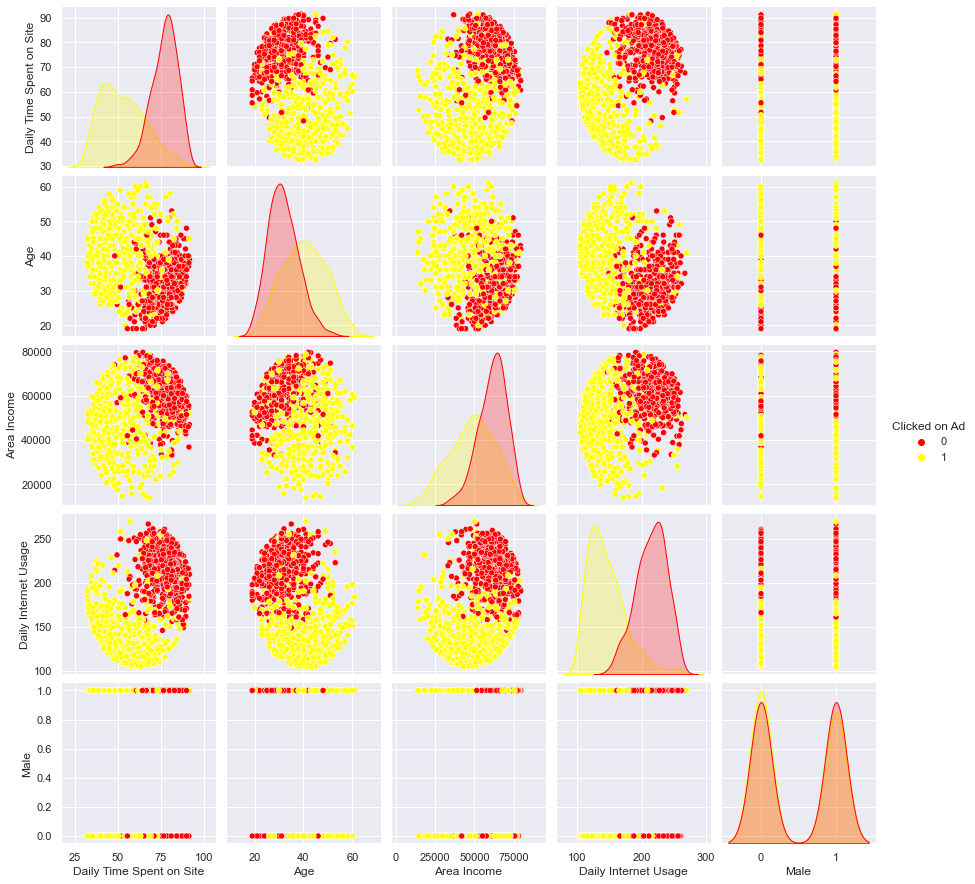

In [125]:
sns.pairplot(data=data,hue='Clicked on Ad',palette=['red','yellow'])

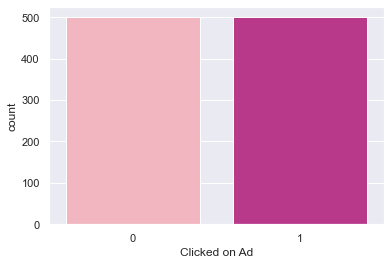

In [126]:
sns.countplot(x = target, palette= 'RdPu')
plt.xlabel('Clicked on Ad');

In [127]:
s_data = data.copy()
s_data['Clicked on Ad'] = s_data['Clicked on Ad'].apply(lambda x: 'yes' if x == 1 else 'no')
s_data['Gender'] = s_data['Male'].apply(lambda x: 'Male' if x == 1 else 'female')
s_data.drop('Male',axis=1,inplace=True)

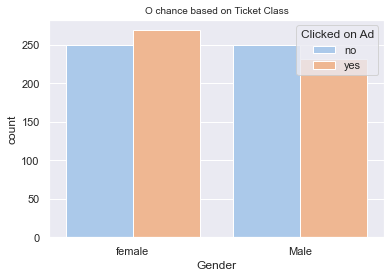

In [128]:
sns.countplot(x = 'Gender', data= s_data, hue= 'Clicked on Ad', palette= 'pastel')
plt.title('O chance based on Ticket Class', fontsize = 10);

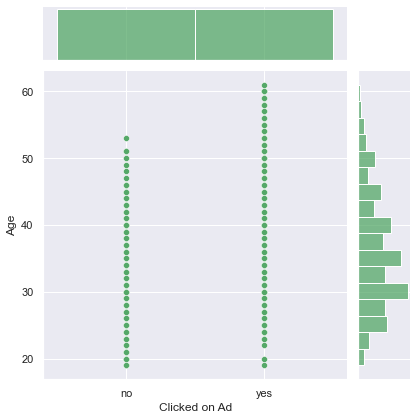

In [129]:
sns.jointplot(data=s_data,y='Age',x='Clicked on Ad',color='g')

# Feature Transformation

In [130]:
data4 = data2.copy()

In [131]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data4[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Daily Time Spent on Site,-0.371203,0.371203,False
1,Age,0.478423,0.478423,False
2,Area Income,-0.649397,0.649397,True
3,Daily Internet Usage,-0.033487,0.033487,False
4,Male,0.076055,0.076055,False


In [132]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data4[column] = np.log1p(data4[column])

In [133]:
data4.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
0,68.95,35,11.032223,256.09,0,Tunisia
1,80.23,31,11.133754,193.77,1,Nauru
2,69.47,26,10.998543,236.50,0,San Marino
3,74.15,29,10.911576,245.89,1,Italy
4,68.37,35,11.210346,225.58,0,Iceland


# Encoding

In [134]:
data5=data4.copy()

In [135]:
data5 = pd.get_dummies(data5)
data5.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,11.032223,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,11.133754,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,10.998543,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,10.911576,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,11.210346,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scaling

In [136]:
data6 = data5.copy()

In [137]:
sc = StandardScaler()
data6[data6.select_dtypes(np.number).columns] = sc.fit_transform(data6[data6.select_dtypes(np.number).columns])

In [139]:
data6.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0.249267,-0.114905,0.529535,1.734030,-0.962695,-0.089803,-0.08396,-0.077693,-0.070888,-0.044766,...,-0.070888,-0.044766,-0.077693,-0.08396,-0.054855,-0.063372,-0.08396,-0.054855,-0.063372,-0.077693
1,0.961132,-0.570425,0.878038,0.313805,1.038750,-0.089803,-0.08396,-0.077693,-0.070888,-0.044766,...,-0.070888,-0.044766,-0.077693,-0.08396,-0.054855,-0.063372,-0.08396,-0.054855,-0.063372,-0.077693
2,0.282083,-1.139826,0.413927,1.287589,-0.962695,-0.089803,-0.08396,-0.077693,-0.070888,-0.044766,...,-0.070888,-0.044766,-0.077693,-0.08396,-0.054855,-0.063372,-0.08396,-0.054855,-0.063372,-0.077693
3,0.577432,-0.798185,0.115418,1.501580,1.038750,-0.089803,-0.08396,-0.077693,-0.070888,-0.044766,...,-0.070888,-0.044766,-0.077693,-0.08396,-0.054855,-0.063372,-0.08396,-0.054855,-0.063372,-0.077693
4,0.212664,-0.114905,1.140937,1.038731,-0.962695,-0.089803,-0.08396,-0.077693,-0.070888,-0.044766,...,-0.070888,-0.044766,-0.077693,-0.08396,-0.054855,-0.063372,-0.08396,-0.054855,-0.063372,-0.077693


# Model

In [141]:
X_train, X_test, y_train, y_test = train_test_split(data6, target, test_size= 0.2)

In [142]:
models = {
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier(verbose=0),
    'lightgbm' : LGBMClassifier(),
    'gradient boosing' : GradientBoostingClassifier(),
    'random forest' : RandomForestClassifier(),
    'logistic regression': LogisticRegression(),
    'naive bayes': GaussianNB(),
}

In [143]:
for name, model in models.items():
    model.fit(data6, target)
    print(f'{name} trained')

xgboost trained
catboost trained
lightgbm trained
gradient boosing trained
random forest trained
logistic regression trained
naive bayes trained


# Evaluating Models

In [144]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

In [145]:
for name, result in results.items():
    print("||----------------||")
    print(f'{name} : {np.mean(result)}')

||----------------||
xgboost : 0.9881062463379404
||----------------||
catboost : 0.9895222933804065
||----------------||
lightgbm : 0.9884468431728338
||----------------||
gradient boosing : 0.9878954332521724
||----------------||
random forest : 0.9914090584032037
||----------------||
logistic regression : 0.9863931081634798
||----------------||
naive bayes : 0.5208366523019072


In [146]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Final Evaluation

In [147]:
print('ROC AUC Score:', round(roc_auc_score(y_test, y_pred), 3))

ROC AUC Score: 0.969


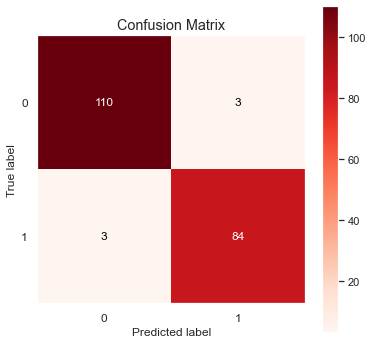

In [148]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'Reds');